In [11]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import GoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [12]:
load_dotenv()

True

In [13]:
model = GoogleGenerativeAI(model="gemini-2.5-pro", api_key=os.getenv("GOOGLE_API_KEY"))


In [14]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [15]:
def create_outline(state: BlogState) -> BlogState:
    prompt = f"create a detailed outline for a blog post titled '{state['title']}'"
    outline = model.invoke(prompt)
    state['outline'] = outline
    return state

In [16]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f"write a detailed blog post based on the title '{title}' and the following outline: {outline}"
    content = model.invoke(prompt)
    state['content'] = content
    return state

In [ ]:
graph = StateGraph(BlogState)

graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

initial_state = BlogState(title="Pakistan cricket team")

final_state = workflow.invoke(initial_state)

print(final_state)





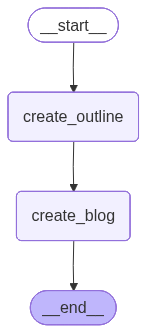

In [18]:
#see graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())